/tmp/ipykernel_857388/4254601975.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  ax2.plot(x, accuracy_pe, "k-", marker="d", color="black", label="Training Time")
/tmp/ipykernel_857388/4254601975.py:48: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  ax2.plot(x, accuracy_pg, "k-", marker="h", color="red", label="Inference Time")


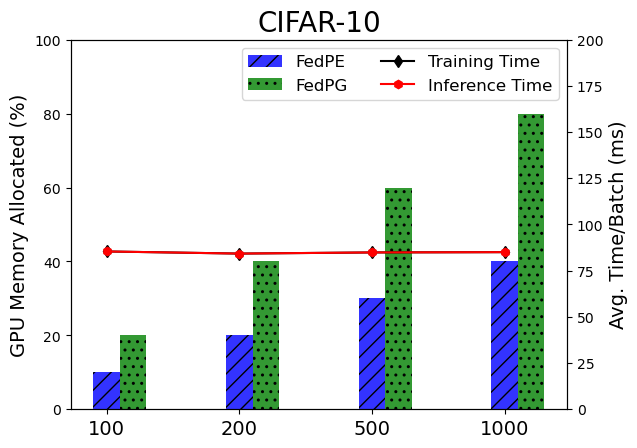

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import textwrap

# Sample data
algorithms = ["FedPE", "FedPG"]

time = np.array([
    [10, 20, 30, 40],
    [20, 40, 60, 80]
])

accuracy_pe = np.array([85.40, 84.25, 84.87, 85.03])

accuracy_pg = np.array([85.40, 84.25, 84.87, 85.03])

n_clients = ["100", "200", "500", "1000"]

hatches = ["//", "..", "\\", "|"]

# Wrap algorithm names
wrapped_algorithms = ['\n'.join(textwrap.wrap(alg, width=12)) for alg in algorithms]

# Colors for each algorithm
colors = ["b", "g", "purple", "y"]

# Create a combined bar and line plot
fig, ax1 = plt.subplots()

# Bar plot with different colors for each algorithm
bar_width = 0.2
index = np.arange(len(n_clients))
x = np.arange(len(n_clients))
opacity = 0.8
for i, (alg, size, color, hatch) in enumerate(zip(algorithms, time, colors, hatches)):
    ax1.bar(index + i * bar_width, size, bar_width, color=color, alpha=opacity, hatch=hatch, label=f"{alg}")
    #ax1.bar(i, size, color=color, alpha=0.6, hatch=hatch, label=f"{alg}")

ax1.tick_params(axis='x', labelsize=14)
ax1.set_xticks(x)
ax1.set_xticklabels(n_clients)
ax1.set_ylim(0, 100)
ax1.set_ylabel("GPU Memory Allocated (%)", fontsize=14)

# Line plot
ax2 = ax1.twinx()
ax2.plot(x, accuracy_pe, "k-", marker="d", color="black", label="Training Time")
ax2.plot(x, accuracy_pg, "k-", marker="h", color="red", label="Inference Time")
ax2.set_ylim(0, 200)
ax2.set_ylabel("Avg. Time/Batch (ms)", fontsize=14)

# Legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc="best", fontsize=12, ncols=2)

# Axis labels
plt.xlabel("Algorithms")
plt.title("CIFAR-10", fontsize=20)
plt.savefig('time_acc.pdf', dpi=300, bbox_inches='tight')

plt.show()
